<a href="https://colab.research.google.com/github/gideonkipkorir/KPMG_Virtual_Intership_Data_cleaning/blob/master/KPMGvirtual_internship_datacleanion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [194]:
# loading libriaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [195]:
df_trans = pd.read_excel('/content/KPMG_VI_New_raw_data_update_final.xlsx', 'Transactions')
df_trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


Data **Undersatanding**

In [196]:
def data_understanding(df):
  return 'Data Dimension', df.shape , 60*'x',df.info(),60*'x', 'checking for missing values',df.isnull().sum(),'checking the number of unique values',60*'x', df.nunique()

In [197]:
data_understanding(df_trans)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

('Data Dimension',
 (20000, 13),
 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx',
 None,
 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx',
 'checking for missing values',
 transaction_id               0
 product_id                   0
 customer_id                  0
 transaction_date             0
 online_order               360
 order_status                 0
 brand                      197
 product_line               197
 product_class              197
 product_size               197
 list_price                   0
 standard_cost              197
 product_first_sold_date    197
 dtype: int64,
 'checking the number of unique values',
 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx',
 transaction_id             20000
 product_id                   101
 customer_id                 3494
 transaction_date             364
 online_order                   2
 order_status                   2
 brand                          6
 product_line          

Droping null values for critical fields that cannot be imputed

In [198]:
def drop_null_val(dataFrame, column_name ):#column should be in quotes
  return dataFrame.dropna(subset = [column_name], inplace=True) ,'New shape :',dataFrame.shape

In [199]:
drop_null_val(df_trans, 'product_first_sold_date')

(None, 'New shape :', (19803, 13))

Descriptive statistic/ Eploratory data analysis

In [256]:
def descriptive_stats(df):
  cat_data = df.select_dtypes(include = 'object')
  num_data = df.select_dtypes(include = [int, float])
  date_data = df.select_dtypes('datetime64[ns]')
  return  'descriptive statistic for categorical data',50*'x' ,cat_data.describe(),'descriptive statistic for numerical data',50*'x',num_data.describe(),'descriptive statistic for date data',50*'x', date_data.describe()

In [258]:
descriptive_stats(df_trans)

('descriptive statistic for categorical data',
 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx',
        order_status  brand product_line product_class product_size
 count         19803  19803        19803         19803        19803
 unique            2      6            4             3            3
 top        Approved  Solex     Standard        medium       medium
 freq          19625   4253        14176         13826        12990,
 'descriptive statistic for numerical data',
 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx',
        transaction_id    product_id  ...  standard_cost  product_first_sold_date
 count    19803.000000  19803.000000  ...   19803.000000             19803.000000
 mean      9993.979650     45.815937  ...     556.046951             38199.776549
 std       5776.499961     30.569841  ...     405.955660              2875.201110
 min          1.000000      0.000000  ...       7.210000             33259.000000
 25%       4988.500000     18.000000  ...     2

There seem to be no anomalies in our dataset

In [10]:
loss = df_trans.list_price-df_trans.standard_cost 
loss.describe()

count    19803.000000
mean       551.950915
std        493.412849
min          4.800000
25%        133.780000
50%        445.210000
75%        830.240000
max       1702.550000
dtype: float64

checks, to see if there were products being sold at a loss

In [206]:
df_trans.duplicated().any()

False

In [248]:
for j in set(df_trans.dtypes):
  if j == 'O':
    print('y')

y


In [245]:
set(df_trans.dtypes)

{dtype('int64'), dtype('<M8[ns]'), dtype('float64'), dtype('O')}

In [13]:

df_trans.to_excel('transaction.xlsx')#exporting our file to an excel file


##Customer demographics analyis

for better analysis we will combine customer demograhics table with  customer adress since they form part of the demographics

In [214]:
customer = pd.read_excel('/content/KPMG_VI_New_raw_data_update_final.xlsx', 'CustomerDemographic',skiprows=1, index_col= None )
customer.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,customer_id.1,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1.0,Laraine,Medendorp,F,93,1953-10-12,1,Health,Mass Customer,N,"""'",Yes,11.0
1,2.0,Eli,Bockman,Male,81,1980-12-16,2,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,4.0,Arlin,Dearle,Male,61,1954-01-20,3,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,5.0,Talbot,NaN,Male,33,1961-10-03,4,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,6.0,Sheila-kathryn,Calton,Female,56,1977-05-13,5,NaN,Affluent Customer,N,NIL,Yes,8.0


## data understanding

In [226]:
data_understanding(customer)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   object        
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   customer_id.1                        4000 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

('Data Dimension',
 (4000, 13),
 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx',
 None,
 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx',
 'checking for missing values',
 customer_id                              0
 first_name                               0
 last_name                              125
 gender                                   0
 past_3_years_bike_related_purchases      0
 DOB                                     87
 customer_id.1                            0
 job_industry_category                  656
 wealth_segment                           0
 deceased_indicator                       0
 default                                302
 owns_car                                 0
 tenure                                  87
 dtype: int64,
 'checking the number of unique values',
 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx',
 customer_id                            4000
 first_name                             3139
 last_name      

## Descriptive statistics / Exploartory analysis

In [236]:
descriptive_stats(customer)

('descriptive statistic for categorical data',
 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx',
                  customer_id first_name  ... default owns_car
 count                   4000       4000  ...    3698     4000
 unique                  4000       3139  ...      90        2
 top     Software Engineer IV       Tobe  ...     100      Yes
 freq                       1          5  ...     113     2024
 
 [4 rows x 10 columns],
 'descriptive statistic for numerical data',
 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx',
        past_3_years_bike_related_purchases       tenure
 count                          4000.000000  3913.000000
 mean                             48.890000    10.657041
 std                              28.715005     5.660146
 min                               0.000000     1.000000
 25%                              24.000000     6.000000
 50%                              48.000000    11.000000
 75%                              73.000000    15.000000
 

In [237]:
customer.customer_id = customer['customer_id.1'] #to update the missing value i custome_id

In [222]:
custAdres = pd.read_excel('/content/KPMG_VI_New_raw_data_update_final.xlsx', 'CustomerAddress', skiprows=1)
custAdres.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


## Data understanding

In [239]:
data_understanding(custAdres)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


('Data Dimension',
 (3999, 6),
 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx',
 None,
 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx',
 'checking for missing values',
 customer_id           0
 address               0
 postcode              0
 state                 0
 country               0
 property_valuation    0
 dtype: int64,
 'checking the number of unique values',
 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx',
 customer_id           3999
 address               3996
 postcode               873
 state                    5
 country                  1
 property_valuation      12
 dtype: int64)

##Descriptive statistics

In [229]:
custdemo = customer.merge(custAdres,right_on = ['customer_id'],left_on ='customer_id' )
custdemo = custdemo.drop(['customer_id.1'],1)
customer.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,customer_id.1,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,1,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,2,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,3,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,4,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,5,NaN,Affluent Customer,N,NIL,Yes,8.0


## Data Understanding

In [230]:
descriptive_stats(custdemo)

('descriptive statistic for categorical data',
 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx',
         customer_id first_name  ... state    country
 count          3995       3995  ...  3995       3995
 unique         3995       3136  ...     5          1
 top            3999        Max  ...   NSW  Australia
 freq              1          5  ...  2052       3995
 
 [4 rows x 12 columns],
 'descriptive statistic for numerical data',
 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx',
        past_3_years_bike_related_purchases  ...  property_valuation
 count                          3995.000000  ...         3995.000000
 mean                             48.874093  ...            7.514393
 std                              28.725026  ...            2.825678
 min                               0.000000  ...            1.000000
 25%                              24.000000  ...            6.000000
 50%                              48.000000  ...            8.000000
 75%               

In [231]:
custdemo.dropna(subset = ['tenure', 'DOB'], inplace = True)#dropping null values for the sensitive fields

## Descriptive statistics / Exploartory analysis

In [232]:
descriptive_stats(custdemo)

('descriptive statistic for categorical data',
 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx',
         customer_id first_name last_name  ...           address state    country
 count          3908       3908      3787  ...              3908  3908       3908
 unique         3908       3076      3642  ...              3905     5          1
 top            3999        Max  Ramsdell  ...  3 Talisman Place   NSW  Australia
 freq              1          5         3  ...                 2  2004       3908
 
 [4 rows x 12 columns],
 'descriptive statistic for numerical data',
 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx',
        past_3_years_bike_related_purchases  ...  property_valuation
 count                          3908.000000  ...         3908.000000
 mean                             49.025844  ...            7.513050
 std                              28.775364  ...            2.825001
 min                               0.000000  ...            1.000000
 25%             

In [234]:
print(custdemo.gender.unique())

['F' 'Male' 'Female' 'U' 'Femal' 'M']


noted some innconsistency in  attributes used to describe gender

In [235]:
custdemo.gender = custdemo.gender.replace({'F':'Female', 'Femal':'Female', 'M': 'Male'}) # correcting to have consistency
custdemo.gender.unique()

array(['Female', 'Male', 'U'], dtype=object)

Checking for outliers for the field 'DOB'

In [259]:
custdemo['year']= custdemo.DOB.dt.year
custdemo.year[:10]

0    1953
1    1980
2    1961
3    1977
4    1966
5    1976
6    1962
7    1973
8    1954
9    1994
Name: year, dtype: int64

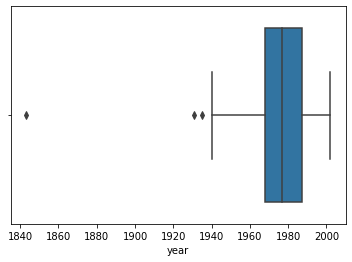

In [260]:
sns.boxplot(x = custdemo.year)

In [46]:
q1 = custdemo.year.quantile(0.001)
custdemo.shape

(3908, 17)

Removing outliers

In [162]:
#removing outliers that are below the year 1930
custdemo =custdemo[custdemo.year>= 1940] 
print(custdemo.shape)

(3905, 17)


In [47]:
custdemo.to_excel('customer.xlsx')